# UofR DPF Failure - Getting Started Python Notebook

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from pandas.io.json import json_normalize

## Load Vehicle List and Select Only "Train" Set

In [151]:
vehicles = pd.read_csv('vehicle_list.csv')

vehicles.head(10)

,fleet,truck_number,platform_id,vehicle_year,vehicle_make,vehicle_model,date_of_service,dpf_failure
0,Conway,432 3619,309450,2014,Freightliner,Cascadia,1/4/2019,Yes
1,Conway,432 3577,308374,2014,Freightliner,Cascadia,1/9/2019,Yes
2,Conway,426 6337,10315963,2013,Freightliner,Cascadia,1/17/2019,Yes
3,Conway,532 4279,10314364,2014,Freightliner,Cascadia,1/28/2019,Yes
4,Conway,432 3754,307112,2014,Freightliner,Cascadia,2/13/2019,Yes
5,Conway,532 5458,10312983,2015,Freightliner,Cascadia,3/16/2019,Yes
6,Conway,432 3874,308049,2014,Freightliner,Cascadia,3/19/2019,Yes
7,Conway,632 3472,310201,2013,Freightliner,Cascadia,4/9/2019,Yes
8,Conway,432 3721,303576,2014,Freightliner,Cascadia,4/17/2019,Yes
9,Conway,432 2497,302332,2012,Freightliner,Cascadia,4/20/2019,Yes


In [152]:
# How many with and without failures?

vehicles.groupby('dpf_failure').size()

dpf_failure
No     69
Yes    92
dtype: int64

## Load Single Vehicle Daily Data

In [4]:
i = 6

df = pd.read_csv('./individual_files/{}_daily_data.csv'.format(vehicles.iloc[i].platform_id))

# delete index column 'Unnamed: 0'
del df['Unnamed: 0']

# set date column to datetime
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

# show
df.head(10)

NameError: name 'pd' is not defined

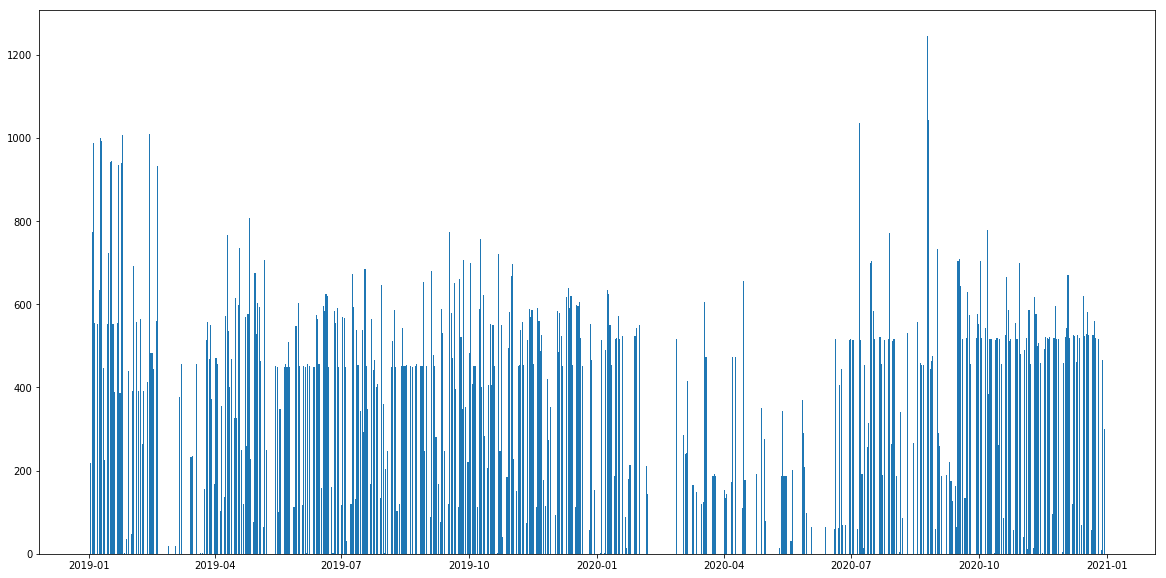

In [154]:
# look at daily miles

plt.figure(figsize=(20, 10))
x = df['date']
y = df['distance_miles']
plt.bar(x, y)
plt.show()

### Look at DTC's for this Vehicle

In [155]:
# get dtc records from day the vehicle went in for service
dtc_records = df[df['vehicle_serviced'] == 1]['diagnostics_trouble_codes'].values[0]

# unpack dtc object to dataframe
dtcs = json_normalize(ast.literal_eval(dtc_records))
dtcs

,active,j1939.fmi.@code,j1939.fmi.@name,j1939.possibleCause,j1939.sa.@code,j1939.severity,j1939.spn.@code,j1939.spn.@name,j1939.suggestedAction,lastOccurrence,occurrenceCount,resolution,totalDurationInMilliseconds
0,False,14,Special Instructions,NaN,42,unclassified,517503,NaN,NaN,2019-03-19T06:48:57.695Z,55,bulk,34904
1,False,19,Received network data error,NaN,0,unclassified,1590,Adaptive Cruise Control Mode,NaN,2019-03-19T06:48:58.282Z,53,bulk,7845
2,False,31,Not available or condition exists,NaN,1,unclassified,458762,NaN,NaN,2019-03-19T15:36:22.213Z,2,bulk,2073
3,False,6,Current above normal or grounded circuit,NaN,1,unclassified,4608,Joystick 7 Y-Axis Lever Forward Positive Posit...,NaN,2019-03-19T15:43:44.246Z,3,bulk,9161
4,False,19,Received network data error,NaN,1,unclassified,341296,NaN,NaN,2019-03-19T15:43:44.246Z,3,bulk,9161
5,True,18,Data valid but below normal range - Moderate S...,NaN,1,unclassified,3216,Aftertreatment 1 Intake NOx,NaN,2019-03-19T15:43:45.257Z,71,bulk,84289926
6,False,4,Voltage below normal or shorted to low source,NaN,11,unclassified,803,Relay Diagonal 2,NaN,2019-03-19T10:02:43.283Z,3,bulk,3841
7,True,18,Data valid but below normal range - Moderate S...,Plugged air filter,1,moderate,102,Engine Intake Manifold #1 Pressure,Inspect air cleaner,2019-03-19T15:45:10.267Z,19,bulk,58063329
8,False,31,Not available or condition exists,NaN,1,unclassified,524287,NaN,NaN,2019-03-19T15:36:22.213Z,2,bulk,2073
9,False,19,Received network data error,NaN,1,unclassified,341350,NaN,NaN,2019-03-19T15:44:36.267Z,2,bulk,4023


## Load All Training Vehicle Daily Data

In [157]:
# create empty dataframe
all_data = pd.DataFrame()

for i, e in vehicles.iterrows():
    try:
        tmp = pd.read_csv('./individual_files/{}_daily_data.csv'.format(e.platform_id))
        if len(all_data) == 0:  # first csv read replaces empty dataframe
            all_data = tmp
        else:  # all other csv reads append to dataframe
            all_data = all_data.append(tmp)
    except:

        None
    
    
# delete index column 'Unnamed: 0'
del all_data['Unnamed: 0']

# set date column to datetime
all_data['date'] = pd.to_datetime(all_data['date'], infer_datetime_format=True)

# show
all_data.head(10)

,date,platform_id,distance_miles,fuel_used_gallons,duration_mins,idle_duration_mins,fuel_loss_gallons,dpf_regen_inhibited_duration_mins,dpf_regen_not_inhibited_duration_mins,dpf_regen_not_active_duration_mins,dpf_regen_active_duration_mins,dpf_regen_needed_duration_mins,dpf_regen_inhibit_switch_not_active_duration_mins,dpf_regen_inhibit_switch_active_duration_mins,vehicle_serviced,diagnostics_trouble_codes
0,2019-01-02,309450,65.294602,7.743177,222.002017,44.141633,0.057875,145.853650,8.650900,154.504550,0.000000,0.000000,0.0,0.0,0,[]
1,2019-01-03,309450,210.269609,32.266755,519.221017,134.957617,0.495596,293.039250,51.976683,345.015933,0.000000,0.000000,0.0,0.0,0,[]
2,2019-01-04,309450,98.413486,15.543700,354.276533,83.660883,0.281884,115.026133,31.087450,41.469600,57.857333,46.786650,0.0,0.0,1,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
3,2019-01-05,309450,74.838556,13.602637,131.153333,30.391967,0.225600,111.522417,15.201283,0.000000,123.756800,2.966900,0.0,0.0,0,[]
4,2019-01-06,309450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,[]
5,2019-01-07,309450,76.971727,9.796143,239.696350,56.132617,0.045396,167.630117,9.350683,15.101417,136.727683,25.151700,0.0,0.0,0,[]
6,2019-01-08,309450,387.613434,65.370074,817.106383,199.210217,3.029140,648.970533,61.438967,710.409500,0.000000,0.000000,0.0,0.0,0,[]
7,2019-01-09,309450,506.462963,82.666647,1019.611867,223.357117,3.438220,847.347133,76.273083,923.620217,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
8,2019-01-10,309450,396.553529,65.532907,793.768050,177.884983,2.316437,599.359300,62.795867,662.155167,0.000000,0.000000,0.0,0.0,0,[]
9,2019-01-11,309450,433.965149,70.310565,930.651567,203.305017,2.605587,805.682267,71.739567,683.756067,129.727000,63.938767,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."


In [158]:
all_data.groupby('platform_id').size()

platform_id
300490      441
300498      729
300500      715
300547      729
300558      729
300573      352
300578      309
300681      729
300703      665
300771      729
300776      713
301117      729
301475      729
301544      728
301554      394
301563      679
301585      729
301589      729
301682      285
301841      729
301842      302
301889      727
301958      268
301972      729
302019      729
302054      729
302230      729
302332      729
302372      730
302548      729
           ... 
10316091    729
10316092    725
10316097    729
10317538    729
10317557    729
10318391    729
10318423    729
10318576    730
10318577    729
10318578    729
10318582    729
10318584    729
10318585    729
10318587    729
10318588    729
10320625    729
10320626    729
10320628    729
10320906    729
10320955    713
10320956    728
10320957    729
10320987    729
10321025    729
10321057    729
10321243    729
10321244    727
10325986     96
10326022     92
10326079     48
Length: 161,